***<p style='color:brown'>Predictive Analysis of Heart Attack Using Machine Learning Approach</p>***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df= pd.read_csv(r"E:\heart.csv")

In [5]:
df.shape

(303, 14)

In [6]:
df.sample(4)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.duplicated().sum()

1

***<font color="blue">1st step:  Remove the duplicate row</font>***

In [11]:
df.loc[df.duplicated(keep=False),:]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
df.drop_duplicates(subset="age",keep="first",inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.rename(columns={'output':"target"},inplace=True)

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target'],
      dtype='object')

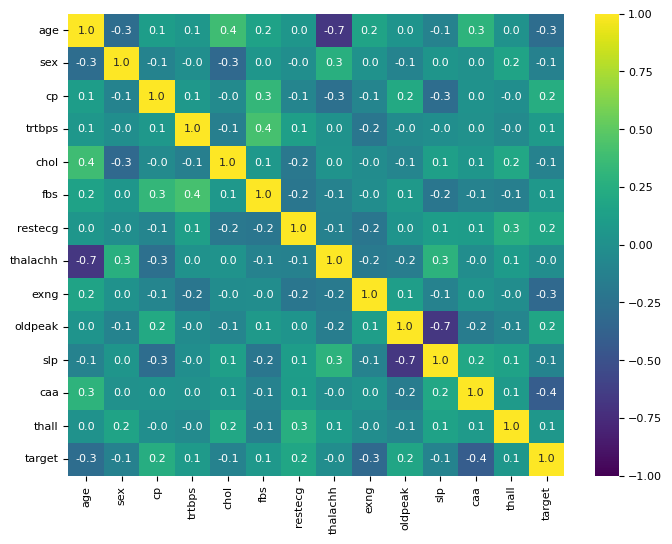

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 8})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1,annot=True,fmt=".1f")
plt.show()

***<font color="blue">2nd step:   Split the dataset into train & test</font>***

In [18]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32, 13)
(9, 13)
(32,)
(9,)


***<font color="blue">3rd step: Apply Feature scaling type Standardization </font>***

In [19]:
obj_scaler = StandardScaler()
X_train_scaler = obj_scaler.fit_transform(X_train)
X_test_scaler = obj_scaler.transform(X_test)

In [20]:
X_train_scaler[0]

array([-1.6331658 , -1.20894105, -1.63788936,  0.16037837, -0.91513993,
       -0.43033148,  0.54671107,  1.28595342, -0.37796447,  0.45437695,
        0.70894901, -0.47140452, -0.3544406 ])

In [21]:
X_train_scaler= pd.DataFrame(X_train_scaler,columns=X_train.columns)
X_test_scaler= pd.DataFrame(X_test_scaler,columns=X_test.columns)
X_train_scaler[0:2]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,-1.633166,-1.208941,-1.637889,0.160378,-0.915140,-0.430331,0.546711,1.285953,-0.377964,0.454377,0.708949,-0.471405,-0.354441
1,0.646406,0.827170,0.501395,-0.402044,-0.275624,-0.430331,0.546711,-0.702528,-0.377964,0.931100,-0.625543,2.357023,1.913979


In [22]:
X_train_scaler.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01
mean,0.000000,1.387779e-17,1.387779e-17,-2.081668e-17,-1.387779e-17,-1.387779e-17,2.775558e-17,-2.775558e-17,-2.775558e-17,2.012279e-16,6.938894e-18,-3.816392e-17,2.775558e-17
std,1.016001,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00
min,-1.633166,-1.208941e+00,-1.637889e+00,-2.370524e+00,-1.021726e+00,-4.303315e-01,-1.397151e+00,-2.470066e+00,-3.779645e-01,-1.214155e+00,-1.960035e+00,-4.714045e-01,-2.622860e+00
25%,-0.894416,-1.208941e+00,-5.682473e-01,-4.020444e-01,-6.520060e-01,-4.303315e-01,-1.397151e+00,-4.401586e-01,-3.779645e-01,-7.970219e-01,-6.255432e-01,-4.714045e-01,-3.544406e-01
50%,-0.071237,8.271702e-01,5.013947e-01,1.603784e-01,-1.890234e-01,-4.303315e-01,5.467111e-01,9.838838e-02,-3.779645e-01,3.724401e-02,7.089490e-01,-4.714045e-01,-3.544406e-01
75%,0.773049,8.271702e-01,5.013947e-01,3.361355e-01,1.607116e-01,-4.303315e-01,5.467111e-01,7.474065e-01,-3.779645e-01,4.841722e-01,7.089490e-01,-4.714045e-01,-3.544406e-01
max,1.912836,8.271702e-01,1.571037e+00,2.550675e+00,4.161014e+00,2.323790e+00,2.490573e+00,1.562131e+00,2.645751e+00,2.957175e+00,7.089490e-01,3.299832e+00,1.913979e+00


## Here I am applying two different models: 
+ Logistic Regression
+ Naive Bayes Classifier

***<font color="blue">4th step: Apply Model <font color="brown"> LogisticRegression</font></font>***

In [23]:
obj_LR = LogisticRegression()
obj_LR.fit(X_train_scaler, y_train)

LogisticRegression()

In [24]:
y_pred = obj_LR.predict(X_test_scaler)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

***<font color="blue">5th step: Compare accuracy from y_test to y_pred  and display final accuracy of the model</font>***

In [25]:
accuracy= accuracy_score(y_test,y_pred)
print(f"Accuracy of the LogisticRegression()  is {accuracy: .2f}")

Accuracy of the LogisticRegression()  is  1.00


***<font color="blue">6th step: Generate Classification Report</font>***

In [26]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



***<font color="blue">7th step: Display Confusion Matrix </font>***

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[9]]


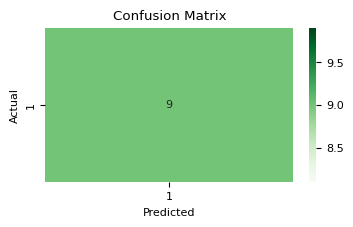

In [28]:
labels = sorted(set(y_test) | set(y_pred))
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_df, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
y_test.shape

(9,)

***<font color="blue">8th step: Apply Model <font color="brown"> Naive Bayes Classifier</font></font>***

In [30]:
obj_GNB = GaussianNB()
obj_GNB.fit(X_train_scaler, y_train)

GaussianNB()

In [31]:
y_pred = obj_GNB.predict(X_test_scaler)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

***<font color="blue">9th step: Compare accuracy from y_test to y_pred  and display final accuracy of the model</font>***

In [32]:
accuracy= accuracy_score(y_test,y_pred)
print(f"Accuracy of the Naive Bayes Classifier is {accuracy: .2f}")

Accuracy of the Naive Bayes Classifier is  1.00


***<font color="blue">10th step: Generate Classification Report of Naive Bayes Classifier model </font>***

In [33]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



***<font color="blue">11th step: Display Confusion Matrix </font>***

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[9]]


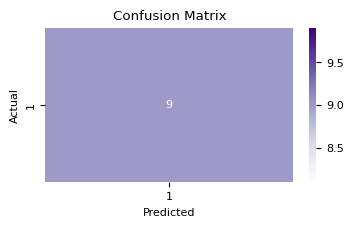

In [35]:
labels = sorted(set(y_test) | set(y_pred))
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_df, annot=True, cmap='Purples', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()